<a href="https://colab.research.google.com/github/silassanttos/Google-Colab/blob/main/Plano_saude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto etapas do processamento do Big Data#

#Coletando dados de estados brasileiros #

In [5]:
import pandas as pd #Biblioteca de leitura e tratamento de dataframes

#lendo arquivo

estados = pd.read_csv('estados_brasileiros.csv', sep = ';', encoding='latin-1')

In [6]:
estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


#Coletando dados de clientes#

In [21]:
clientes = pd.read_excel('dados_clientes.xlsx')
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


#Coletando dados das idades dos clientes#

In [8]:
idade = pd.read_csv('idade_clientes.csv', sep = ';', encoding='latin-1')
idade.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


#Analisando as variáveis da base de dados#

In [9]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  547 non-null    int64  
 3   genero      547 non-null    object 
 4   id_estado   547 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 21.5+ KB


Analisando a base inicial de clientes, responda: Qual a média do colesterol dos clientes? 
Resposta: 170.433272

In [10]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,547.00000,542.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638
std,158.04957,30.836868,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [11]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [12]:
idade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


In [13]:
idade.describe()

,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


#Analisando dados ausentes#

In [14]:
#Verificando valores ausentes/nulos na base#
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

In [15]:
clientes.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [16]:
idade.isna().sum()

id_cliente    0
idade         0
dtype: int64

In [17]:
#Verificando os registros com valores nulos#

clientes.loc[clientes['peso'].isnull()]

,id_cliente,peso,colesterol,genero,id_estado
63,64,NaN,211,Masculino,12
101,102,NaN,230,Feminino,24
146,147,NaN,171,Masculino,23
195,196,NaN,143,Feminino,15
215,216,NaN,180,Masculino,13


Identificamos 3 valores ausentes na base de dados de clientes. Para esse caso, temos 3 opções para tratamento de dados númericos.


  1. Eliminação dos registros.
  2. Média dos pesos dos clientes: Realiza a média dos pesos OBS: A média pe fortemente influenciada pela presença de valores extremos.
  3. Médiana dos pesos dos clientes, Realiza a mediana dos pesos. (medida que pega o valor central dos dados)

Por exempplo:

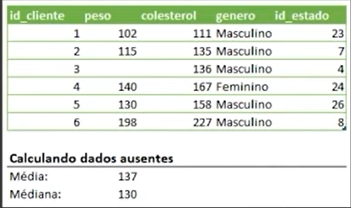


#Eliminando dados ausentes#

In [18]:
#Dados ausentes#

clientes.dropna(subset=['peso'], inplace=True) #Para eliminar o registroç Inplace = True significa que quer alterar os dados naquele dataframe.

In [19]:
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [20]:
clientes.count()

id_cliente    542
peso          542
colesterol    542
genero        542
id_estado     542
dtype: int64

Alterando os dados por outras medidas

In [22]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,547.00000,542.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638
std,158.04957,30.836868,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [24]:
#Realizando a média e mediana da variável peso#
media = clientes.peso.mean()
mediana = clientes.peso.median()

In [25]:
#Verificando  valores#

print(f"O valor da média dos pesos é: {media} \nO valor da mediana é:{mediana}")

O valor da média dos pesos é: 143.4409594095941 
O valor da mediana é:140.0


In [26]:
#Fazendo arrendondamento da variável média#
round(media,2)

143.44

In [27]:
#preencher valores ausentes pela média#
clientes.peso.fillna(round(media,2), inplace=True)

In [29]:
#Verifica se existe algum valor ausente#
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [30]:
clientes.count()

id_cliente    547
peso          547
colesterol    547
genero        547
id_estado     547
dtype: int64

#Substituindo variável categórica#

Quando temos uma variável do tipo categórica, uma avordagem é substituir o valor ausente pela variável mais frequente encontrada no conjunto de dados.


In [31]:
print(estados.pais.value_counts())

Brasil    25
Name: pais, dtype: int64


In [32]:
estados.pais.fillna('Brasil', inplace=True)

In [33]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

#Analisando distribuição dos dados#

In [46]:
import matplotlib.pyplot as plt

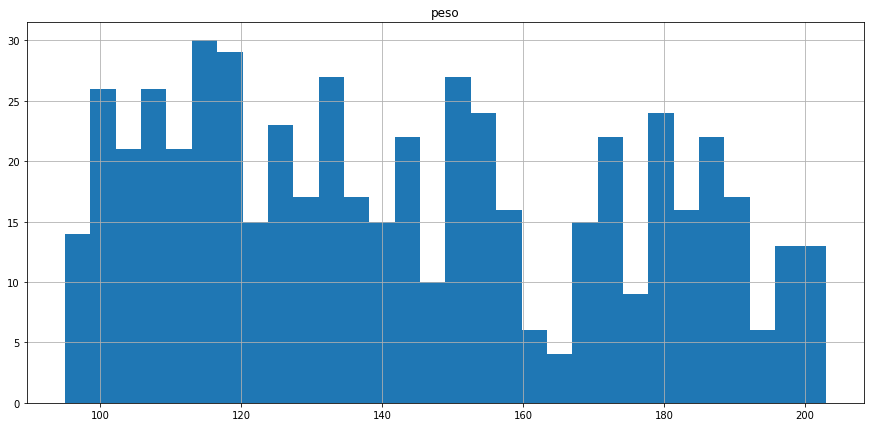

In [50]:
clientes.hist(column='peso', figsize=(15,7))
plt.show()

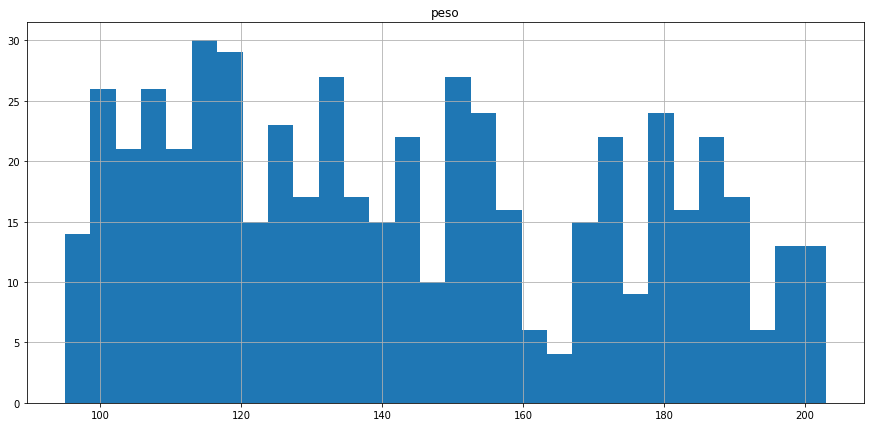

In [53]:
clientes.hist(column='peso', figsize=(15,7), bins=30)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99a5a5d5d0>]],
      dtype=object)

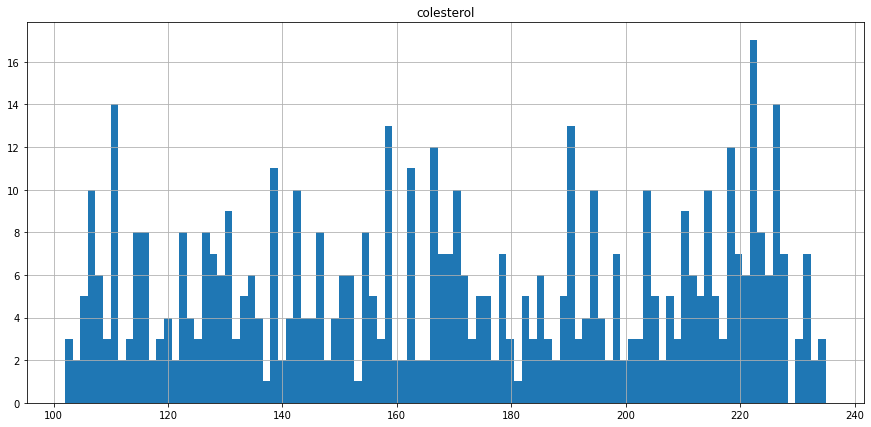

In [41]:
clientes.hist(column='colesterol', figsize=(15,7), bins=100)

In [42]:
#Criando um identificador para a variável genero#
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
clientes['genero_number'] = LE.fit_transform(clientes['genero'])

In [43]:
clientes

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
...,...,...,...,...,...,...
542,543,172.0,207,Masculino,22,1
543,544,129.0,157,Masculino,1,1
544,545,107.0,115,Masculino,6,1
545,546,117.0,147,Masculino,20,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9996d5f750>]],
      dtype=object)

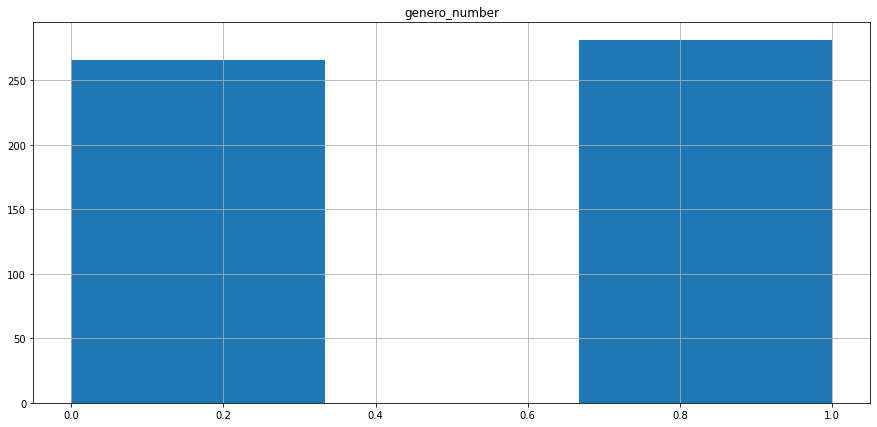

In [55]:
clientes.hist(column='genero_number', figsize=(15,7), bins=3)

#Junções entre os dados coletados#
Nessa etapa vamos realizar o merge entre os dados que realizamos a coleta.

In [56]:
estados[:5]

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [57]:
clientes[:5]

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1


In [59]:
clientes_estados = pd.merge(clientes, estados, on='id_estado')
clientes_estados.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
18,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil
40,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil
65,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil
87,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil
...,...,...,...,...,...,...,...,...,...
443,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil
478,544,129.0,157,Masculino,1,1,Acre,ac,Brasil
178,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil
396,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil


In [60]:
#Realiza junção entre clientes e idades#
base_completa = pd.merge(clientes_estados, idade, on='id_cliente').sort_values('id_cliente')

In [64]:
base_completa

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
18,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
40,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
65,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
87,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
443,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
478,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
178,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
396,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [117]:
base_completa.reset_index(drop=True)

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,0
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,0
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,0
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil,3
4,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,3
...,...,...,...,...,...,...,...,...,...,...
542,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,2
543,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,3
544,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,0
545,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,3


#Organizando a base de dados#

Podemos realizar várias alterações na base de dadoa fim de melhorar o entendimento e disposição das colunas. Além disso, podemos fazer transformações nos textos das linhas e colunas.



In [118]:
#Alterando nome das colunas
base_completa.rename(columns={'id_cliente': 'cod_cliente', 'genero_number': 'cod_genero'}, inplace= True)
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,0
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,0
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,0
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil,3
4,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,3
...,...,...,...,...,...,...,...,...,...,...
542,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,2
543,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,3
544,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,0
545,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,3


In [119]:
#alterando as linhas da variável sigla_estado

base_completa.sigla_estado.str.upper()

0      RR
1      DF
2      AM
3      SC
4      SE
       ..
542    RO
543    AC
544    CE
545    RN
546    ES
Name: sigla_estado, Length: 547, dtype: object

In [77]:
#Inserindo alteração realizada

base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()

#Alterando disposição das colunas do arquivo de dados#
vamos alterar as disposições das colunas no nosso conjunto de dados a fim de facilitar a visualização

In [78]:
base_completa[['cod_cliente', 'genero', 'idade','peso','colesterol','id_estado', 'estado','sigla_estado', 'pais']]

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
18,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
40,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
65,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil
87,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
...,...,...,...,...,...,...,...,...,...
443,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil
478,544,Masculino,66,129.0,157,1,Acre,AC,Brasil
178,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil
396,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil


In [79]:
base_completa = base_completa[['cod_cliente', 'genero', 'idade','peso','colesterol','id_estado', 'estado','sigla_estado', 'pais']].reset_index(drop=True)

In [80]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil
4,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
...,...,...,...,...,...,...,...,...,...
542,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil
543,544,Masculino,66,129.0,157,1,Acre,AC,Brasil
544,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil
545,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil


#Analise de dados#

É a etapa onde selecionamos os algoritmos de Machine Learning que serão inseridos para alcançar o resultado, levando em consideração o conjunto de dados obtidos na etapa anterior.

Para esse trabalho, vamos realziar um agrupamento de pessoas baseado no colesterol, peso e idade das pessoas.



#Aplicando método do cotovelo#

Vamosiniciar visualizando identificando o npumero de cluster necesspario para realizxar o agrupamento.

In [120]:
from sklearn.cluster import KMeans

In [121]:
def calcular_wcss(dados_clientes):
  wcss = []
  for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X=dados_cliente)
    wcss.append(kmeans.inertia_)
  return wcss

In [122]:
dados_cliente = base_completa[['peso', 'colesterol', 'idade']]
dados_cliente.head()

,peso,colesterol,idade
0,102.0,111,17
1,115.0,135,28
2,115.0,136,62
3,140.0,167,55
4,130.0,158,44


In [96]:
wcss_clientes = calcular_wcss(dados_cliente)

In [123]:
#visualizando os dados obtidos do WCSS

for i in range(len(wcss_clientes)):
  print(f'O cluster {i} possui valor de wcss de:{wcss_clientes[i]}')

O cluster 0 possui valor de wcss de:1476678.1664643502
O cluster 1 possui valor de wcss de:457970.4625118851
O cluster 2 possui valor de wcss de:268077.2887419374
O cluster 3 possui valor de wcss de:208894.82367103768
O cluster 4 possui valor de wcss de:180612.50815673603
O cluster 5 possui valor de wcss de:156656.05040415912
O cluster 6 possui valor de wcss de:131708.50854148273
O cluster 7 possui valor de wcss de:110927.07903453812
O cluster 8 possui valor de wcss de:95534.23957914734
O cluster 9 possui valor de wcss de:86346.82849438052


#Vizualizando o gráfico do cotovelo#

In [112]:
import plotly.express as px #criação de graficos dinânimos
import plotly.offline as py
import plotly.graph_objects as go # para criação e concatenização de graficos

In [113]:
grafico_wcss = px.line( x = range(1,11),
                        y=wcss_clientes
                       )
fig = go.Figure(grafico_wcss)

fig.update_layout(title='Calculando o WCSS',
                  xaxis_title='Numero de clusters',
                  yaxis_title='Valor do Wcss',
                  template = 'plotly_white')
fig.show()

In [116]:
kmeans_clientes = KMeans(n_clusters=4, random_state=0)
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_cliente)

In [115]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,0
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,0
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,4
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil,2
4,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,2
...,...,...,...,...,...,...,...,...,...,...
542,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,3
543,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,2
544,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,0
545,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,2


#Calcula os centroides de cada cluster#

In [110]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[107.45637584, 120.69798658,  43.58389262],
       [154.33621622, 189.84684685,  42.73873874],
       [185.02758621, 219.6137931 ,  42.84827586],
       [130.21746479, 157.22535211,  41.94366197]])